# Trypsinogen Autocatalysis

Trypsinogen is converted into trypsin. The reaction starts only in the presence of some trypsin, that is, the product of the reaction acts as a catalyst. 

**Skills you will practice**: 
* Import/use libraries
* Define functions
* Implement Control Flow
* Plot with Matplotlib.pyplot
* Use f strings
* Index lists 

## Trypsinogen

[Trypsin]() is a protease involved in food digestion. It is produced by the acinar cells of the pancreas. Trypsin cleaves the peptide bond on the carboxyl side of basic amino acids such as arginine and lysine. 

>Trypsinogen is the proenzyme precursor of trypsin. Trypsinogen (the inactive form) is stored in the pancreas so that it may be released when required for protein digestion. The pancreas stores the inactive form trypsinogen because the active trypsin would cause severe damage to the tissue of the pancreas. Trypsinogen is released by the pancreas into the second part of the duodenum, via the pancreatic duct, along with other digestive enzymes.

**'Self' Activation by Autocatalysis**

>Trypsinogen is activated by enteropeptidase (also known as enterokinase). Enteropeptidase is produced by the mucosa of duodenum and it cleaves the peptide bond of trypsinogen after residue 15, which is a lysine. The N-terminal peptide is discarded, and a slight rearrangement of the folded protein occurs. The newly formed N-terminal residue (residue 16) inserts into a cleft, where its α-amino group forms an ion pair with the aspartate near the active site serine, and results in the conformational rearrangement of other residues. The amino group of Gly 193 orientates itself into the correct position, which completes the oxyanion hole in active site, thereby activating the protein. Since trypsin also cleaves the peptide bond after an arginine or a lysine, it can cleave other trypsinogen, and the activation process therefore becomes autocatalytic.

## Challenge: 

Model Trypsinogen autocatalysis as an initial value problem.

Let $y_0$ be the initial concentration of trypsin at time $t=0$ and let $y=y(t)$ trypsin formed from trypsinogen at time $t=t_i$. The total concentration will be $y_0 + y(t)$. 

Let $B$ denote the initial concentration of trypsinogen. Each autocatalyzed molecule of trypsinogen yields one trypsin, thus $B$ decreases by the same amount as $y(t)$ increases. Therefore, at time $t$, the concentrations of trypsinogen and trypsin are $B-y$ and $y_0 + y$ respectively. Assuming the reaction rate $\frac{dy}{dt}$ is directly proportional to these terms related through a proportionality constant $k$. 

The law of mass action states that the rate of a chemical reaction is directly proportional to the product of the concentrations (or activities) of the reactants, each raised to the power of its coefficient in the chemical equation. 

$$\text{Trypsinogen} + \text{Trypsin} \rightarrow 2\text{Trypsin}$$

Thus, the rate of this reaction ($\frac{d[Trypsin]}{dt}$) is proportional to the product of the concentrations of the reactants, raised to the power of their stoichiometric coefficients (i.e. 1).  

$$\frac{dy}{dt} = k(B-y)(y_0 + y) \tag{1}$$

Solve the differential equation as an initial value problem to find an equation for $y(t)$.

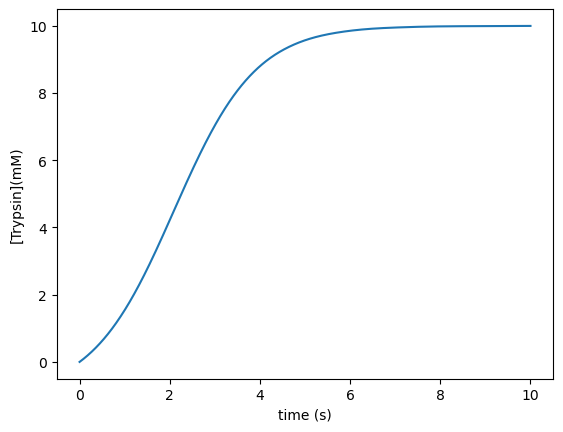

In [3]:
# Import the libraries
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Define the function 
def ode(t, y, k, B, y0):
    dydt = k * (B - y) * (y0 + y)
    return [dydt]

# Define the parameters
k = 0.1 # rate constant
B = 10 # init conc of trypsinogen
y0 = 1 # init conc of trypsin

# Define the initial condition
y_init = [0]

t_span = (0, 10) # seconds
t_eval = np.linspace(t_span[0], t_span[1], 1000) # Number/range of solutions

# Set up the solver
sol = solve_ivp(ode, t_span, y_init, args = (k, B, y0), t_eval=t_eval)

# plot the solutions
plt.plot(sol.t, sol.y[0])
plt.xlabel('time (s)')
plt.ylabel('[Trypsin](mM)')
plt.show()